<a href="https://colab.research.google.com/github/gitnicolas343/intro_neurociencias_Computacionesles_phyton/blob/main/Lab3_Phase_Plane_Analysis_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Campos Vectoriales Planares

Para sistemas de EDOs en 2D es posible tener una descripción cualitativa y geométrica del comportamiento del sistema
gracias a que podemos visualizar el comportamiento de las 2 variables en un plano.

Este cuaderno explora el modelo FitzHugh-Nagumo, un sistema simplificado que describe el comportamiento de membranas neuronales. Dividiremos el análisis en varias secciones: cálculo del retrato de fase, cálculo de las curvas nulas (nullclines), identificación de puntos de equilibrio y su estabilidad, y exploraremos cómo una bifurcación puede ser inducida por cambios en la corriente externa.

Para este análisis, usamos las ecuaciones:

$$
\frac{dV}{dt}=V-\frac{V^3}{3}-w+I_{ext} \\
\frac{dw}{dt}=\frac{1}{\tau}(V+a-bw)
$$

donde:

- $V$: Potencial de membrana.
- $w$: Variable de recuperación
- $I_{ext}$: Corriente externa constante.
- $a$, $b$, y $\tau$: parámetros de ajuste.

Usando los valores de parámetros $a = 0.3$, $b = 1.4$ y $\tau = 20$, realice los siguientes ejercicios:

## Ejercicio 1: Protocolo de Estimulación por pulsos

Simule el sistema de FN en el intervalo (-50,300) el -50 hace que cuando grafiquemos el tiempo desde 0, el sistema habrá ya evolucionado hacia el atractor adecuado. Use un protocolo de estimulación usando $I_{ext}(t)$ = 0.05 en el
intervalo $10<t<15$, 0.1 en $110<t<115$ y 0.15 en $210<t<215$.

Grafique las soluciones de $V$y $w$ en el tiempo, grafique en un panel debajo también la corriente de estimulación. Finalmente en otro panel muestre el resultado de las trayectorias en el espacio de estados. Describa sus observaciones.

In [ ]:
# TODO
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

#parametros

a = 0.3
b = 1.4
tau = 20

#  Iext(t)  = 0.05 en el intervalo  10<t<15 , 0.1 en  110<t<115  y 0.15 en  210<t<215 .

def I_ext0(t):      #corriente aplicada en el tiempo, funcion a trozos con un condicional if que da una amplitus de 0,5 para el t = 2 y 2,5 de igual forma para 10 y 10,5
    if t<10:
        return 0
    elif 10<t and t<15:
        return 0.05

    elif t>=110 and 115>t:
        return 0.1

    elif t>=210 and 215>t:
        return 0.15
    else:
        return 0


def ecuaciones_a_resolverhn(t,X,a,b,tau):
    V = X[0]
    W = X[1]
    I = I_ext0(t)
    return [V-(V**3)/3-W+I,1/tau*(V+a-b*W)]

tspan= [-50,300]
x0 = [0,0]
solucion = solve_ivp(ecuaciones_a_resolverhn,tspan,x0,args=(0.3,1.4,20),dense_output = True )

tiempo_denso = np.linspace(tspan[0],tspan[-1],50000)  #tiempo denso

In [ ]:
#SOLUCION DE LA ECUACION DIFERENCIAL

tiempo = solucion.t
V,w  = solucion.y
V1,w1 =solucion.sol(tiempo_denso)

#EVALUACION DEL TIEMPO
x = np.linspace(tspan[0],tspan[-1],50000)

evaluaciones_i  = list()
for i in x:
    evaluaciones_i.append(I_ext0(i))

# GRAFICAS

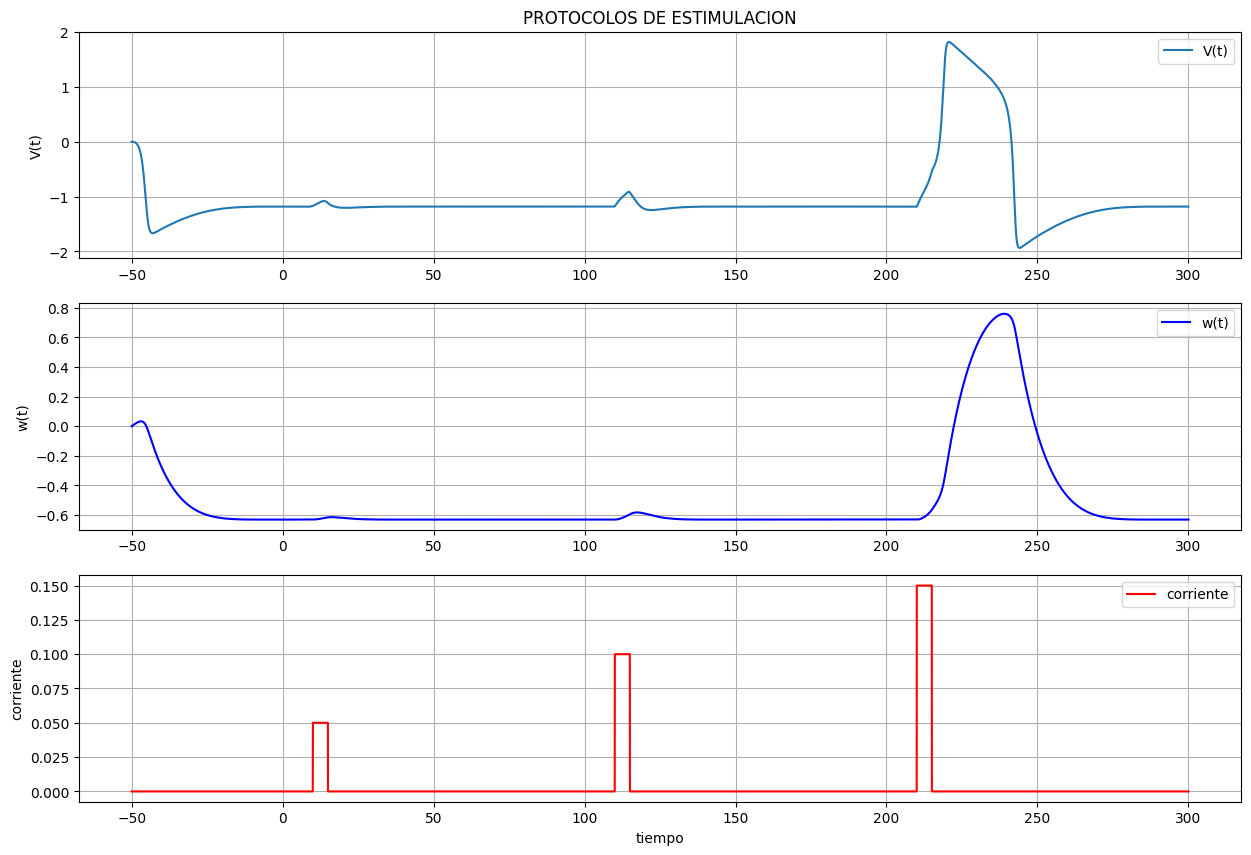

In [ ]:

plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.title('PROTOCOLOS DE ESTIMULACION')
plt.plot(tiempo_denso,V1,label='V(t)')
plt.ylabel('V(t)')
plt.legend()
plt.grid()


plt.subplot(3,1,2)
plt.plot(tiempo_denso,w1,label='w(t)', color = 'b')
plt.ylabel('w(t)')
plt.legend()
plt.grid()


plt.subplot(3,1,3)
plt.plot(x,evaluaciones_i, label = 'corriente', color = 'r')
plt.xlabel('tiempo')
plt.ylabel('corriente')
plt.legend()
plt.grid()
plt.show()

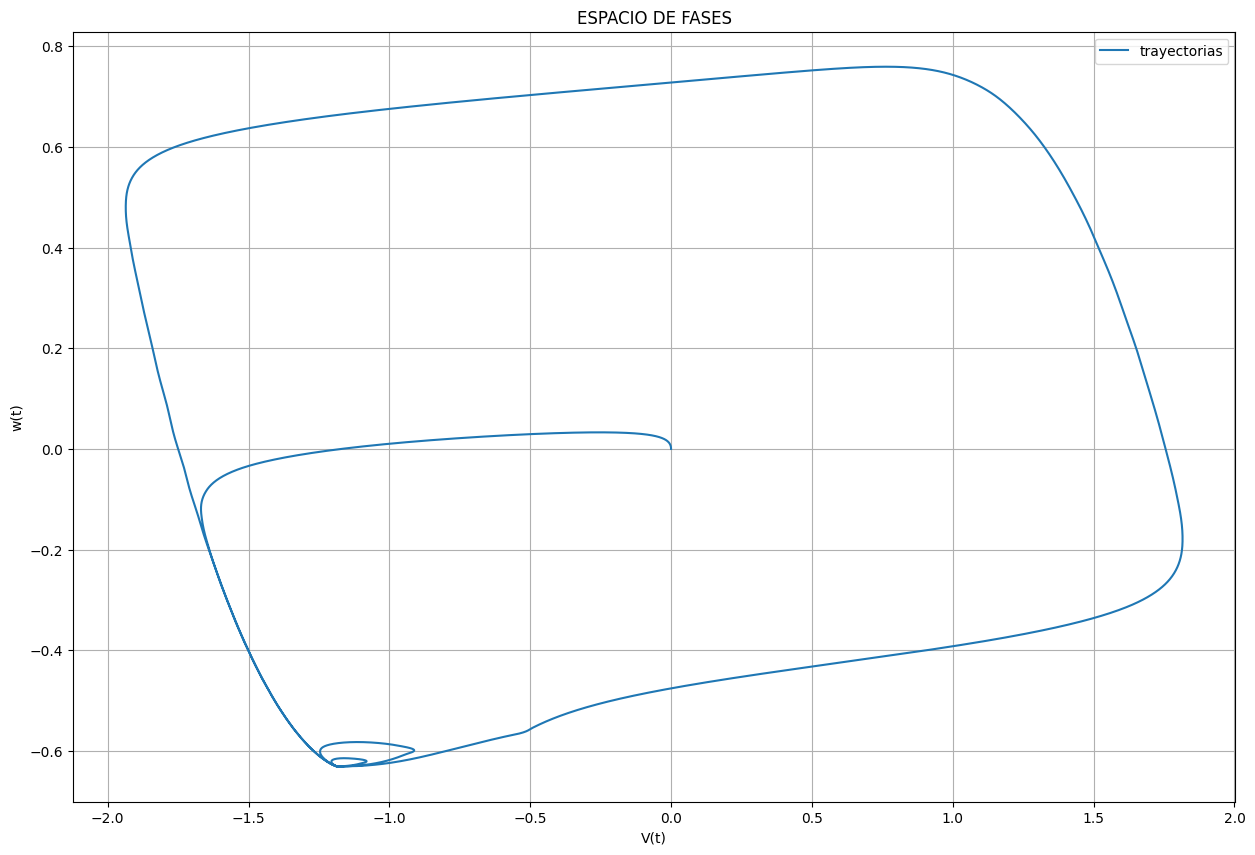

In [ ]:
#ESPACIO DE FASES
plt.figure(figsize=(15,10))
plt.title('ESPACIO DE FASES')

plt.plot(V1,w1,label='trayectorias')
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 2: Protocolo de estimulación DC

Repita el ejercicio anterior pero usando una corriente constante igual a $I_{ext}=0.23$ en el intervalo $10<t<260$. Describa nuevamente lo observado.

In [ ]:
# TODO

#parametros

a = 0.3
b = 1.4
tau = 20

#  Iext(t)  = 0.05 en el intervalo  10<t<15 , 0.1 en  110<t<115  y 0.15 en  210<t<215 .

def I_ext1(t):      #corriente aplicada en el tiempo, funcion a trozos con un condicional if que da una amplitus de 0,5 para el t = 2 y 2,5 de igual forma para 10 y 10,5
    if t<10:
        return 0
    elif 10<t and t<260:
        return 0.23
    else:
        return 0


def ecuaciones_a_resolverhn1(t,X,a,b,tau):
    V = X[0]
    W = X[1]
    I = I_ext1(t)
    return [V-(V**3)/3-W+I,1/tau*(V+a-b*W)]

tspan= [-50,300]
x0 = [0,0]

solucion = solve_ivp(ecuaciones_a_resolverhn1,tspan,x0,args=(0.3,1.4,20),dense_output = True )

tiempo_denso = np.linspace(tspan[0],tspan[-1],50000)  #tiempo denso


#SOLUCION DE LA ECUACION DIFERENCIAL

tiempo = solucion.t
V,w  = solucion.y
V1,w1 =solucion.sol(tiempo_denso)

#EVALUACION DEL TIEMPO
x = np.linspace(tspan[0],tspan[-1],50000)
evaluaciones_i  = list()
for i in x:
    evaluaciones_i.append(I_ext1(i))



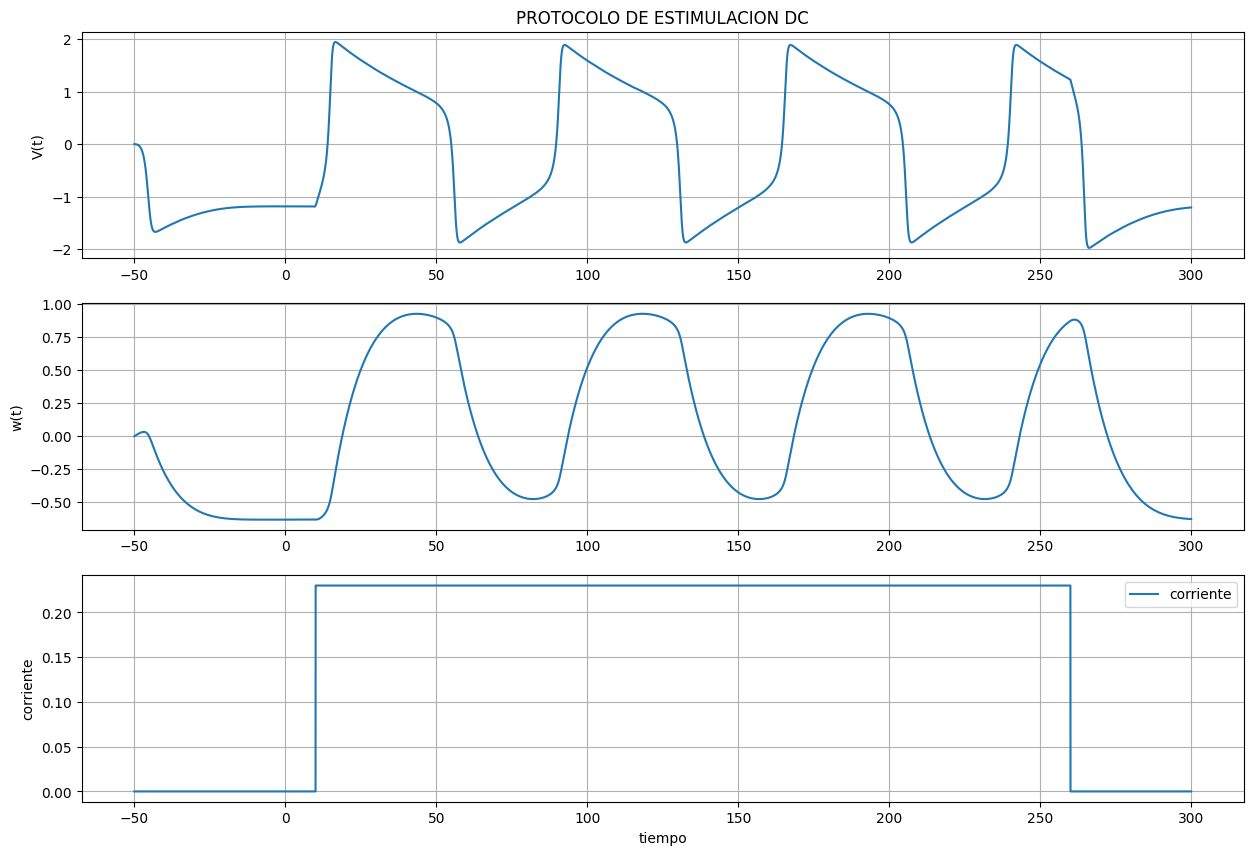

In [ ]:

#CONFIGURACION DE GRAFICAS

plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.title('PROTOCOLO DE ESTIMULACION DC')
plt.plot(tiempo_denso,V1,label='V(t)')
plt.ylabel('V(t)')
plt.grid()


plt.subplot(3,1,2)
plt.plot(tiempo_denso,w1,label='w(t)')
plt.ylabel('w(t)')
plt.grid()


plt.subplot(3,1,3)
plt.plot(x,evaluaciones_i, label = 'corriente')
plt.xlabel('tiempo')
plt.ylabel('corriente')
plt.legend()
plt.grid()
plt.show()

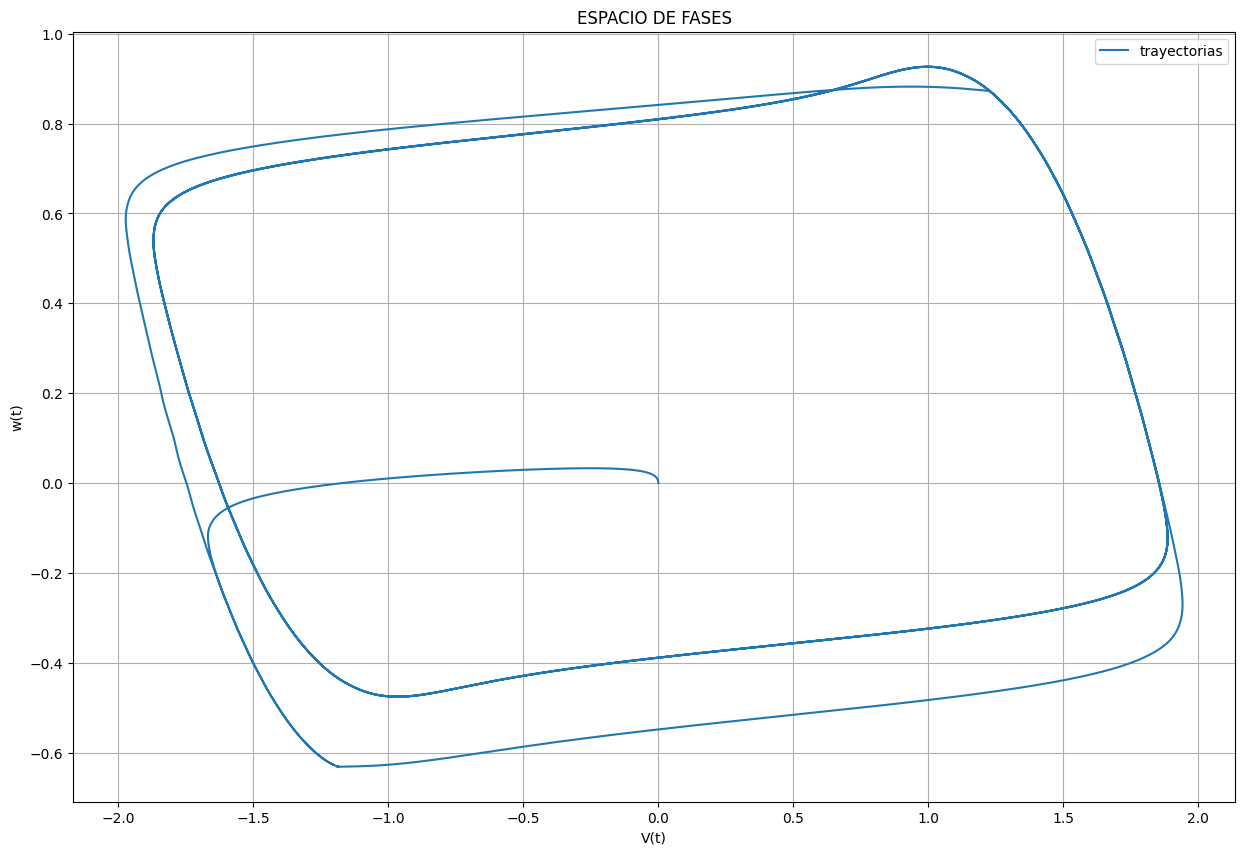

In [ ]:
#GRAFICA DE ESPACIO DE FASES

plt.figure(figsize=(15,10))
plt.title('ESPACIO DE FASES')
plt.plot(V1,w1,label='trayectorias')
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()

## Ejercicio 3: Retrato de Fase

Aquí se representa visualmente el comportamiento del sistema en el espacio de fases, trazando los campos de vectores para diferentes valores de $V$ y $w$. Un retrato de fase permite identificar las trayectorias y los patrones de estabilidad del sistema.

Usando el valor de corriente $I_{ext}=0$ cree el retrato de fase usando la ayuda del comando *meshgrid* para generar el camo vectorial, y ayúdese del comando de matplotlib *streamplot* para graficarlo. En el mismo gráfico muestre 3 trayectorias representativas con condiciones iniciales a su gusto.

In [ ]:
# TODO

#parametros
a = 0.3
b = 1.4
tau = 20

#  Iext(t)  = 0

def I_ext(t):
        return 0


def ecuaciones_a_resolver(t,X,a,b,tau):
    V = X[0]
    W = X[1]
    I = 0
    return [V-(V**3)/3-W+I,1/tau*(V+a-b*W)]

tspan= [-3000,3000]
x0 = [0,0]
solucion = solve_ivp(ecuaciones_a_resolver,tspan,x0,args=(0.3,1.4,20),dense_output = True )

tiempo_denso = np.linspace(tspan[0],tspan[-1],50000)  #tiempo denso


#SOLUCION DE LA ECUACION DIFERENCIAL

tiempo = solucion.t
V,w  = solucion.y
V1,w1 =solucion.sol(tiempo_denso)

In [ ]:
#PARAMETROS(CONDICIONES INICIALES SELECCIONADAS)
x0 = [-4,4]
solucion = solve_ivp(ecuaciones_a_resolver,tspan,x0,args=(0.3,1.4,20),dense_output = True )
#SOLUCION DE LA ECUACION DIFERENCIAL
tiempo = solucion.t
V,w  = solucion.y
V12,w12 =solucion.sol(tiempo_denso)

In [ ]:
#CONDICIONES INICIALES SELECCIONADAS
x0 = [0,-4]
solucion = solve_ivp(ecuaciones_a_resolver,tspan,x0,args=(0.3,1.4,20),dense_output = True )
#SOLUCION DE LA ECUACION DIFERENCIAL
tiempo = solucion.t
V,w  = solucion.y
V2,w2 =solucion.sol(tiempo_denso)

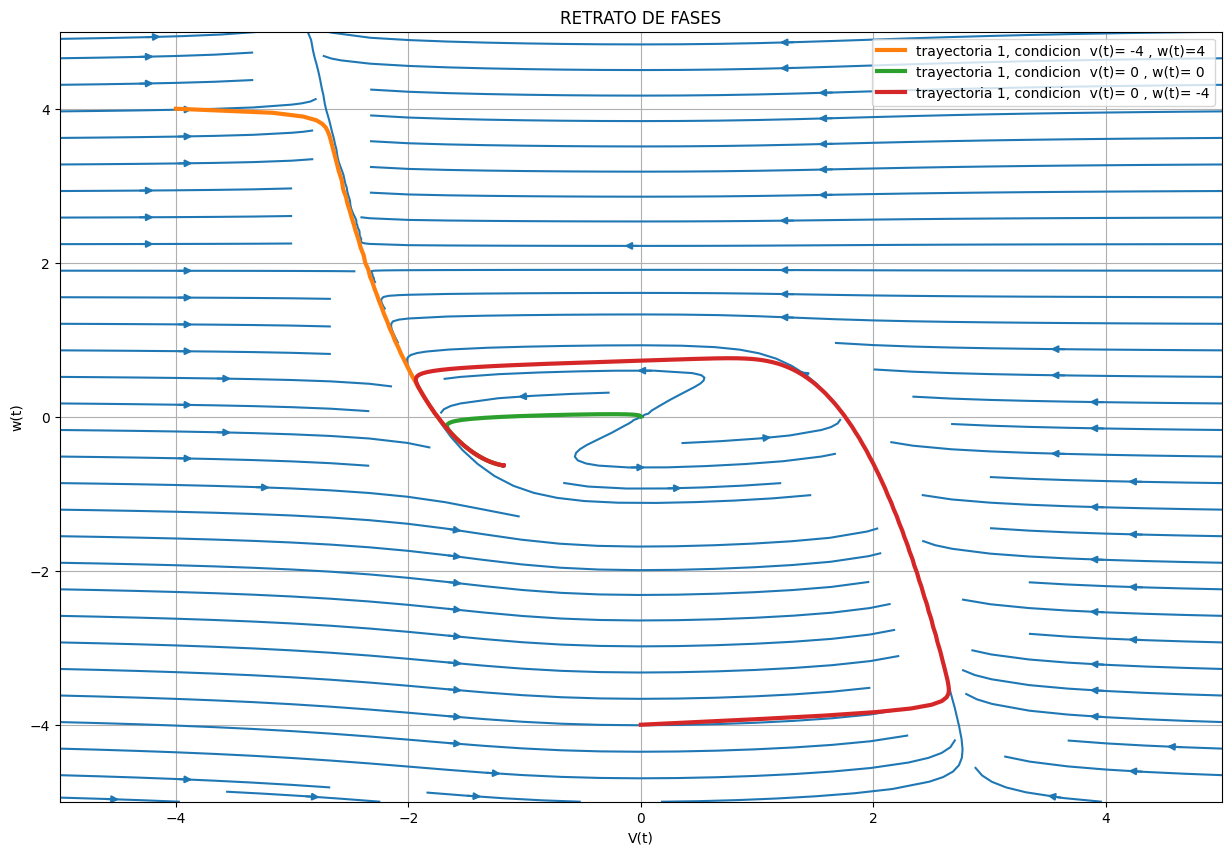

In [ ]:
#EVALUACION DEL MESHGRID

a = np.linspace(-5,5,100)
b = np.linspace(-5,5,100)
V,W = np.meshgrid(a,b)     #MERSHGRID
I = 0

#ECUACIONES EVALUADAS EN LAS SOLUCIONES
ecu1 = V-(V**3)/3-W+I
ecu2 = 1/tau*(V+a-b*W)




#CONFIGURACIONN DE LA GRAFICA
plt.figure(figsize=(15,10))
plt.title('RETRATO DE FASES')
plt.streamplot(V,W,ecu1,ecu2)        #GRAFICACION DE ECU1 Y ECU 2 EN EL MHERSGRID
plt.plot(V12,w12, linewidth=3, label = 'trayectoria 1, condicion  v(t)= -4 , w(t)=4')
plt.plot(V1,w1, linewidth=3, label = 'trayectoria 1, condicion  v(t)= 0 , w(t)= 0')
plt.plot(V2,w2, linewidth=3, label = 'trayectoria 1, condicion  v(t)= 0 , w(t)= -4')
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 4: Curvas Nulas (Nullclines)

Las curvas nulas (nullclines) representan las regiones en el espacio de fases donde la derivada de $V$ o $w$ es cero. Estas curvas son útiles para localizar los puntos de equilibrio del sistema.

Curva nula de $V$: $w = V-\frac{V^3}{3}+I_{ext}$.

Curva nula de $w$: $w = \frac{V+a}{b}$

Agregue al retrato de fase las nulclinas.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


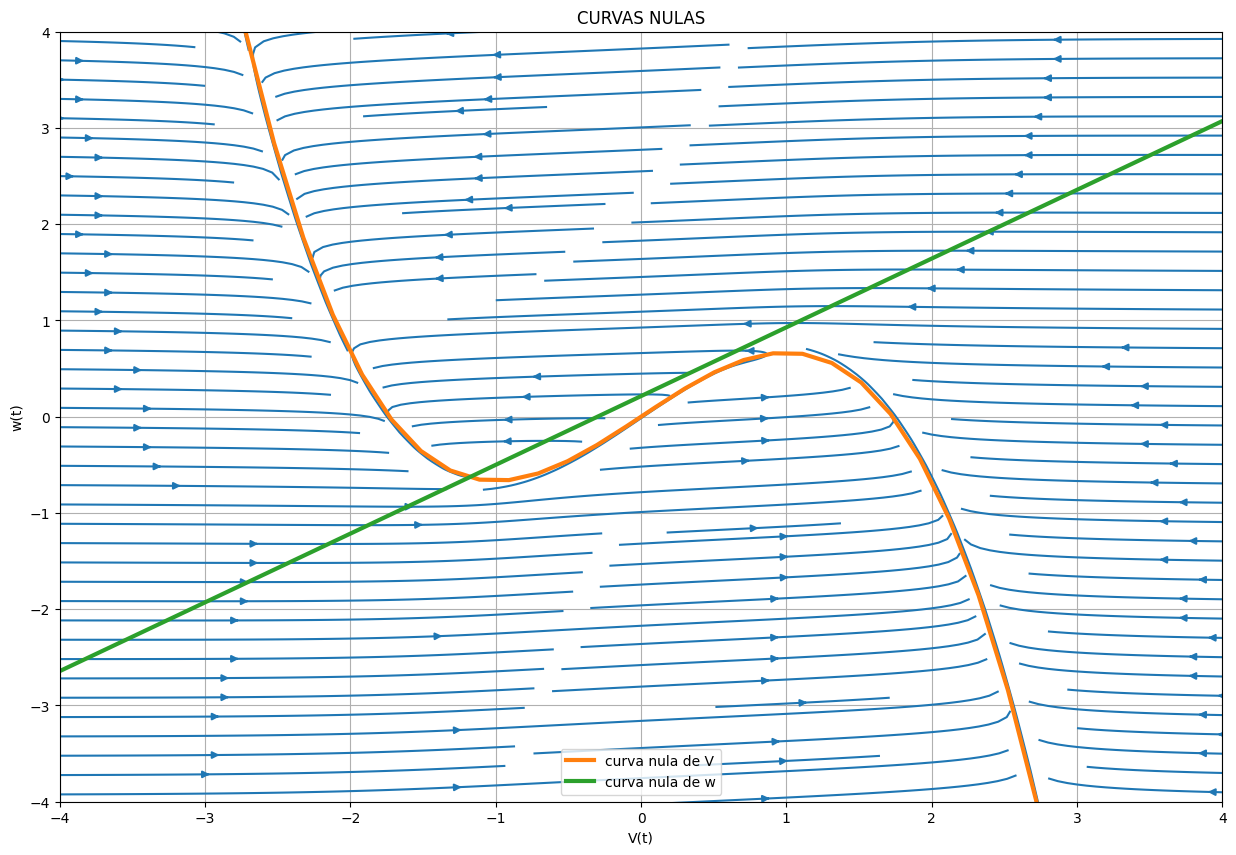

In [ ]:
# TODO

a = 0.3
b = 1.4
tau = 20


k1 = np.linspace(-5,5,100)
u1 = np.linspace(-15,15,100)      #un vector con valores para  u y k  que seran evaluados en el mershesgrid
V1,W1 = np.meshgrid(k1,u1)        #evalacion del mershegrid
I = 0


#ECUACIONES A EVALUAR EN EL MERSHGRID
ecu1_1 = V1-(V1**3)/3-W1+I
ecu2_1 = 1/tau*(V1+a-b*W1)

#CURVAS NULAS
z = np.linspace(-10,10,100)
V_0z = z - (z**3)/3
uu = (z + a)/b                         #parace que ya habia tenido la misma idea de llamar otra variable w_0z, y solo graficaba una linea recta

#CONFIGURACION GRAFICA
plt.figure(figsize=(15,10))
plt.title('CURVAS NULAS')
plt.streamplot(V1,W1,ecu1_1,ecu2_1, density = 5)
plt.plot(z,V_0z, label = 'curva nula de V', linewidth = 3)
plt.plot(z,uu, label = 'curva nula de w', linewidth = 3)
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

## Ejercicio 5: Puntos de Equilibrio y Estabilidad

Los puntos de equilibrio son las intersecciones de las curvas nulas. O lo que es lo mismo la solución simultánea del r.h.s de la ecuación diferencial,

$$
0=V-\frac{V^3}{3}-w+I\\
0=V+a-bw
$$

De la segunda ecuación tenemos que $w = \frac{1}{b}(V+a)$ y que al ser reeemplazada en la primera nos queda el polinomio cúbico $\frac{1}{3}V^3 + V(\frac{1}{b}-1)+(\frac{a}{b}-I)=0$. Así los equilibrios se hallan econtrando las raíces del polinomio cúbico.

Para determinar la estabilidad de cada equilibrio hallado, calculamos el Jacobiano:

$$
J = \begin{pmatrix} \frac{\partial f_V}{\partial V} & \frac{\partial f_V}{\partial w} \\ \frac{\partial f_w}{\partial V} & \frac{\partial f_w}{\partial w} \end{pmatrix} = \begin{pmatrix} 1 - V^2 & -1 \\ \frac{1}{\tau} & -\frac{b}{\tau} \end{pmatrix}
$$

Evaluamos el Jacobiano en cada punto de equilibrio y calculamos sus valores propios.

Calcule el punto de equilibrio para el sistema que estamos estudiando e identifique si es estable o inestable. Grafíquelo en la figura que estamos haciendo colocando un símbolo relleno en caso de que el punto se estable y un símbolo vacío en caso de que sea inestable.

Pista: Use el comando *roots* de numpy para hallar las raices del polinomio


# SISTEMA CON I = 0

In [ ]:
# TODO
#esta seccion se ocupa de encontrar las raices de los polinomios de las curvas nulas para hallar los equilibrios

a = 0.3
b = 1.4

coefficientes =  [1/3, 0, (1/b - 1),a/b]       #lista de coeficientes
roots = np.roots(coefficientes)                #raices de los coeficientes
cual_real= np.isreal(roots)                    #verificamos cual de los retornos del array son reales
raices_reales = roots[cual_real].real          #buscamos al evaluar en el arreglo de root y extraemos las reales dado que np.esreal retorna una mascara boolena [false,true,...etc]
x_ = raices_reales                             #se evalua en roots que previamente hallo los coeficientes
y_ =1/b*(x_ + a)



In [ ]:
#esta funcion como su nombre lo indica halla la estabilidad y devuelve el punto en  la cooedenada v asociado
def defenir_estabilidad(equilibrio):
    estabilidades = list()                                             #aqui guardo la caracteristica estable o inestable  con el equilibrio asociado
    for equilibrio in equilibrio:                                      #para cada equilibrio

        jaco = np.array([[1 - equilibrio**2,-1], [1/tau,-b/tau]])      #calcular el jacobiano dado
        eigvalues_ev0 = np.linalg.eigvals(jaco)                        #eigen valores del jacobiano
        eigvalues_ev = np.real(eigvalues_ev0)                          #solo parte real
        print('equilibrio',equilibrio,'valores propios',eigvalues_ev)  #reporte de lo que hace la funcion hasta este punto


        if all(eigvalues_ev < 0):                                  #con las funciones all que segun la documentacion
                                                                   #Pruebe si todos los elementos de la matriz a lo
            estabilidades.append(('estable',float(equilibrio)))    #largo de un eje determinado se evalúan como Verdadero
        else:
            estabilidades.append(('inestable',float(equilibrio)))

    return estabilidades                                           #dependiendo de la evaluacion retornara estable y sino inestable
#prueba
print(defenir_estabilidad(x_))


equilibrio -1.1833774402467006 valores propios [-0.23519108 -0.23519108]
[('estable', -1.1833774402467006)]


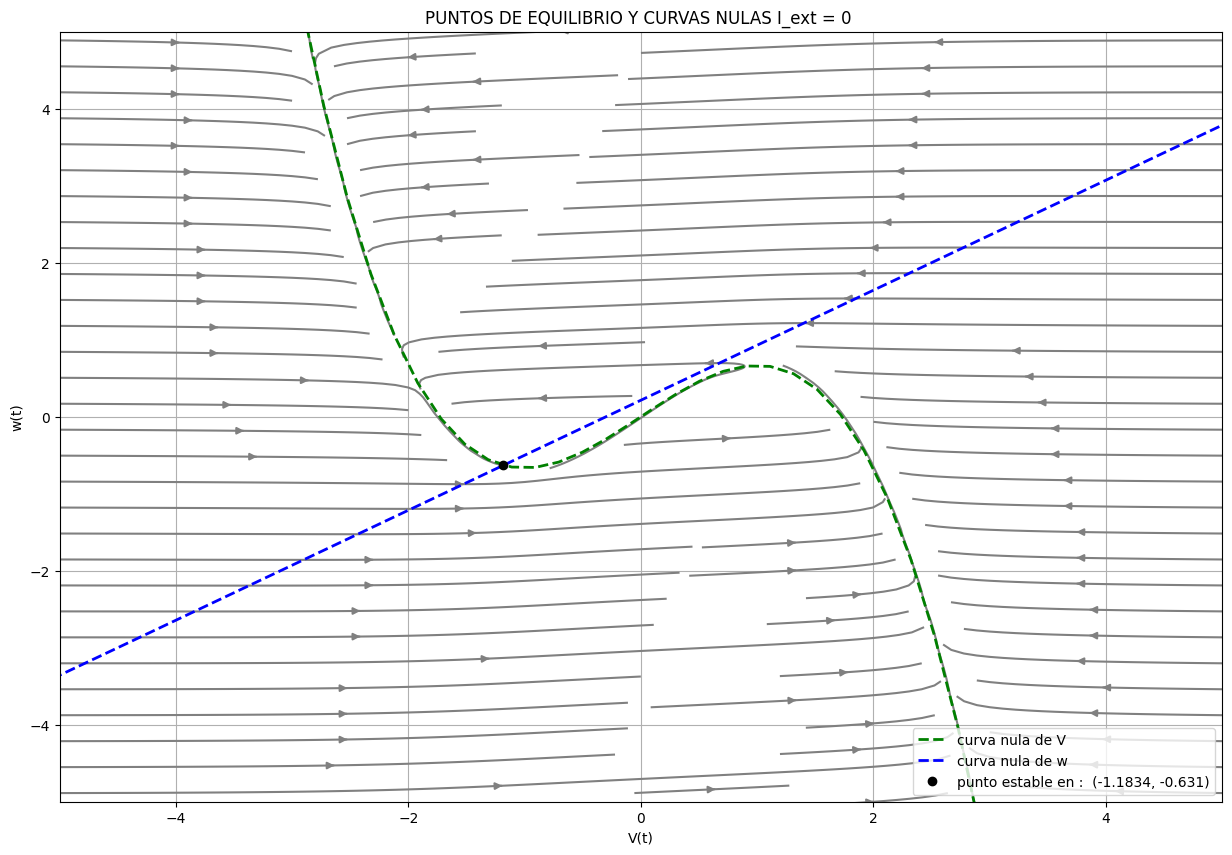

In [ ]:
plt.figure(figsize=(15,10))

plt.title('PUNTOS DE EQUILIBRIO Y CURVAS NULAS I_ext = 0 ')
plt.streamplot(V1,W1,ecu1_1,ecu2_1,density=3 , color  = 'grey' )
plt.plot(z,V_0z,'g--' ,label = 'curva nula de V', linewidth = 2)
plt.plot(z,uu,'b--' ,label = 'curva nula de w', linewidth = 2)
plt.plot(x_,y_,'o',color = 'black',label = f'punto estable en :  {round(float(x_[0]),4),round(float(y_[0]),4)}')
plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend(loc = 'lower right')
plt.grid()
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.show()

se puede ver que los flujos del retarto de fase se haceran entrando en el punto de equilibrio de las curvas nulas

## Ejercicio 6: Comparación de retratos de fase

Muestre en una figura con 3 paneles diferentes el retrato de fase completo (con todos los elementos calculados en los puntos 2 a 5) del sistema de FN para 3 valores diferentes de corriente: $I_{ext} = 0, 0.2, 0.4$

In [ ]:
#la grafica para i_ext = 0  es la anterior
#ESTA ES LA GRAFICA PARA I_EXT = 0.2
a = 0.3
b = 1.4
tau = 20
k12 = np.linspace(-2,2,5000)
u12 = np.linspace(-2,2,5000)          #un vector con valores para  u y k  que seran evaluados en el mershesgrid (REDEFINIDOS PARA ESTE CASO)
V12,W12 = np.meshgrid(k12,u12)        #evalacion del mershegrid


#ecuaciones para cada paremetro de I

I_X2 = 0.2                        #I_X2 = 0.2
ecu1_2 = V12-(V12**3)/3-W12+I_X2
ecu2_2 = 1/tau*(V12+a-b*W12)

z1 = np.linspace(-2,2,5000)
V_0z_2 = z1-(z1**3)/3+I_X2
uu_2 = (z1+a)/b


#calculo de raices

coefficientes_2 =  [1/3, 0, (1/b - 1), a/b - I_X2]    #lista de coeficientes
roots_2 = np.roots(coefficientes_2)                #raices de los coaeficientes
cual_real_2= np.isreal(roots_2)                    #verificamos cual de los retornos del array son reales
raices_reales_2 = roots_2[cual_real_2].real        #buscamos al evaluar en el arreglo de root y extraemos las reales
x_2 = raices_reales_2
y_2 =1/b*(x_2 + a)


#salidas de los eigen valores y la definicion de estabilidad
defi_estabilidad_1 =  defenir_estabilidad(x_2)
print('estabilidades y puntos en V',defi_estabilidad_1)

equilibrio -0.9498745173428432 valores propios [0.0138692 0.0138692]
equilibrio 0.8997273928787526 valores propios [0.06024531 0.06024531]
equilibrio 0.050147124464090906 valores propios [ 0.94838807 -0.0209028 ]
estabilidades y puntos en V [('inestable', -0.9498745173428432), ('inestable', 0.8997273928787526), ('inestable', 0.050147124464090906)]


In [ ]:
a = 0.3
b = 1.4
tau = 20
k13 = np.linspace(-2,2,5000)
u13 = np.linspace(-2,2,5000)          #un vector con valores para  u y k  que seran evaluados en el mershesgrid (REDEFINIDOS PARA ESTE CASO)
V13,W13 = np.meshgrid(k13,u13)        #evalacion del mershegrid



#ecuaciones para cada paremetro de I
I_X3 = 0.4                        #I_X2 = 0.2
ecu1_3 = V13-(V13**3)/3-W13+I_X3
ecu2_3 = 1/tau*(V13+a-b*W13)

z3 = np.linspace(-2,2,5000)
V_0z_3 = z3-(z3**3)/3+I_X3

uu_3 = (z3+a)/b



#calculo de raices
coefficientes_3 =  [1/3, 0, (1/b - 1),a/b-I_X3]    #lista de coeficientes
roots_3 = np.roots(coefficientes_3)                #raices de los coaeficientes
cual_real_3= np.isreal(roots_3)                    #verificamos cual de los retornos del array son reales
raices_reales_3 = roots_3[cual_real_3].real        #buscamos al evaluar en el arreglo de root y extraemos las reales
x_3 = raices_reales_3
y_3 =1/b*(x_3 + a)


#salidas de los eigen valores y la definicion de estabilidad
defi_estabilidad_2 =  defenir_estabilidad(x_3)
print('ESTABILIDADES Y PUNTOS EN V',defi_estabilidad_2)

equilibrio 1.157012741940234 valores propios [-0.20433924 -0.20433924]
ESTABILIDADES Y PUNTOS EN V [('estable', 1.157012741940234)]


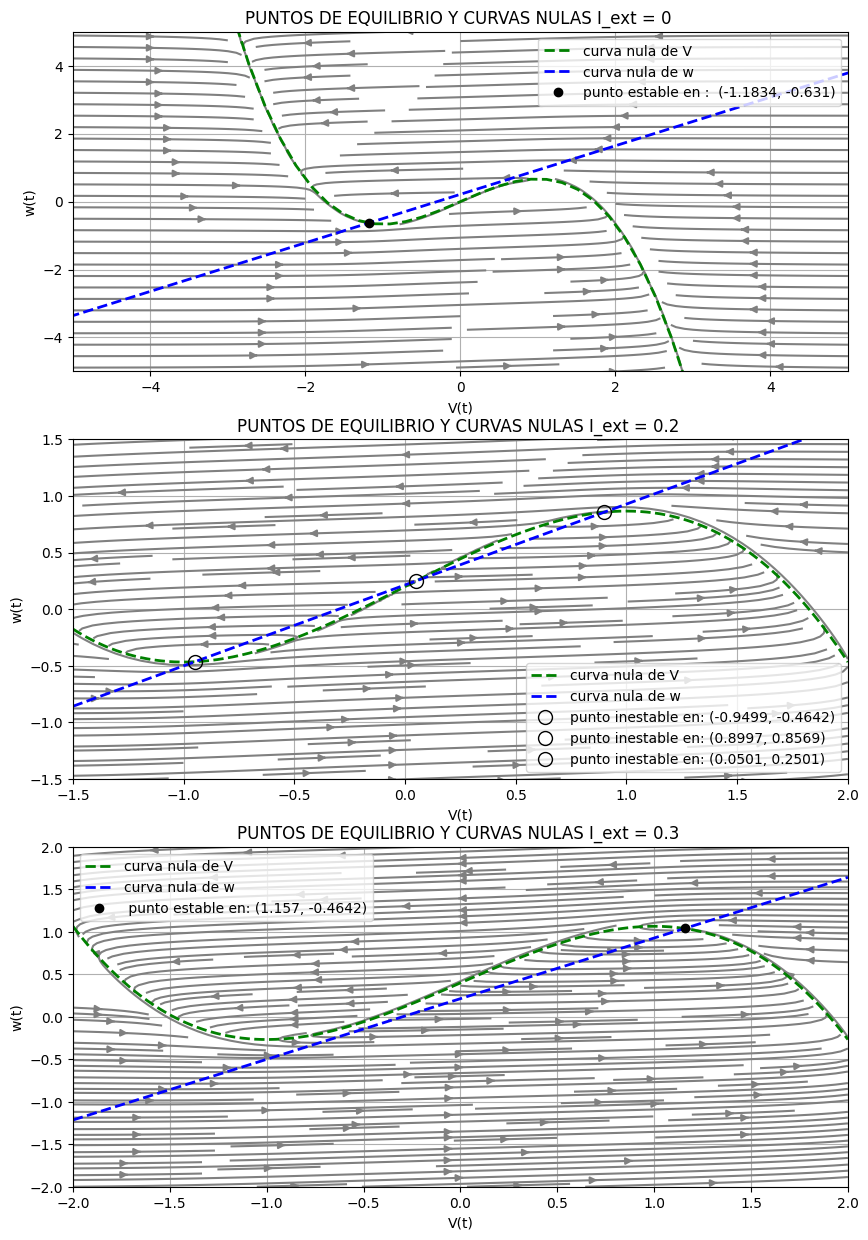

In [ ]:
#GRAFICAS:


plt.figure(figsize=(10,15))

plt.subplot(3,1,1)

#GRAFICA  I_ext =0
plt.title('PUNTOS DE EQUILIBRIO Y CURVAS NULAS I_ext = 0 ')
plt.streamplot(V1,W1,ecu1_1,ecu2_1,density=3 , color  = 'grey' )
plt.plot(z,V_0z,'g--' ,label = 'curva nula de V', linewidth = 2)
plt.plot(z,uu,'b--' ,label = 'curva nula de w', linewidth = 2)
plt.plot(x_,y_,'o',color = 'black',label = f'punto estable en :  {round(float(x_[0]),4),round(float(y_[0]),4)}')  #aqui no use ciclo por que se podia ubicar solo con la salida de la

                                                                                                                   #funcion defenir_estabilidad

plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.legend(loc="best")



#PARA I_ext = 0.2
plt.subplot(3,1,2)
plt.title('PUNTOS DE EQUILIBRIO Y CURVAS NULAS I_ext = 0.2 ')


plt.streamplot(V12,W12,ecu1_2,ecu2_2,density=2 , color  = 'grey' )
plt.plot(z1,V_0z_2,'g--' ,label = 'curva nula de V', linewidth = 2)  #opte por lineas puntadas para ver las estabilidades
plt.plot(z1,uu_2,'b--' ,label = 'curva nula de w', linewidth = 2)
cont = 0             #este contador lo uso para saber la posicion del valor de w asociado con V y graficar la estabilidad
for i in defi_estabilidad_1:
    estabili = i[0]  #primer elemento del retorno de defi_estabilidad es un string que indica si es estable o instable
    punto = i[1]     #segundo elemento es  el valor en V
    if estabili=='estable':
        plt.plot(punto,y_2[cont],'o',color = 'black',
                 label = f' punto estable en: {(round(punto,4),round(float(y_2[cont]),4))}')   #aqui se plotea el puno con su valor 8v,w) asociado ademas de su estabilidad
    else:
        plt.plot(punto, y_2[cont], 'o', color = 'black',markerfacecolor='none',markersize=10,
                 label = f'punto inestable en: {(round(punto,4),round(float(y_2[cont]),4))}')

    cont = cont + 1



plt.ylabel('w(t)')
plt.xlabel('V(t)')
plt.legend()
plt.grid()
plt.ylim(-1.5,1.5)
plt.xlim(-1.5,2)
plt.legend(loc="best")   #tube que usar este modulo por que las imagenes estaban un poco saturadas y no se entendia la legenda

#para  I_ext = 0.3

plt.subplot(3,1,3)
plt.title('PUNTOS DE EQUILIBRIO Y CURVAS NULAS I_ext = 0.3 ')


plt.streamplot(V13,W13,ecu1_3,ecu2_3,density=2 , color  = 'grey' )
plt.plot(z3,V_0z_3,'g--' ,label = 'curva nula de V', linewidth = 2)
plt.plot(z3,uu_3,'b--' ,label = 'curva nula de w', linewidth = 2)
cont = 0
for i in defi_estabilidad_2:
    estabili = i[0]

    punto = i[1]

    if estabili=='estable':
        plt.plot(punto,y_3[cont],'o',color = 'black',
                 label = f' punto estable en: {(round(punto,4),round(float(y_2[cont]),4))}')  #este ciclo toma la salida de la funcion defi_estabilidad
    else:                                                                                     #compara los string y devuelve una grafica para un punto si es
        plt.plot(punto, y_3[cont], 'o', color = 'black',markerfacecolor='none',markersize=10, #estable o inestable
                 label = f'punto inestable en: {(round(punto,4),round(float(y_2[cont]),4))}')

    cont = cont + 1



plt.xlabel('V(t)')
plt.ylabel('w(t)')
plt.legend()
plt.grid()
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.legend(loc="best")

plt.show()